**Import Libraries**

In [1]:
# Import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn import metrics

**Read Data**

In [2]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [4]:
# Check the dimensions of the dataframe
df.shape

(319795, 18)

In [5]:
# Check for data characters mistakes

In [6]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
# It seems that there is No data characters mistakes!


In [8]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
# Notice we have 319,795 entries

**Check the data type**

In [10]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [11]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [12]:
# Most columns are with object type!

In [13]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [14]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [15]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [16]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [17]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [18]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [19]:
# Check for missing values

In [20]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [21]:
# Data doesn't contain any Null values!

In [22]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


**Exploratory Data Analysis (EDA)**

(array([1.72840e+04, 1.72106e+05, 1.00863e+05, 2.33270e+04, 4.88800e+03,
        9.37000e+02, 2.61000e+02, 8.70000e+01, 2.90000e+01, 1.30000e+01]),
 array([12.02 , 20.303, 28.586, 36.869, 45.152, 53.435, 61.718, 70.001,
        78.284, 86.567, 94.85 ]),
 <a list of 10 Patch objects>)

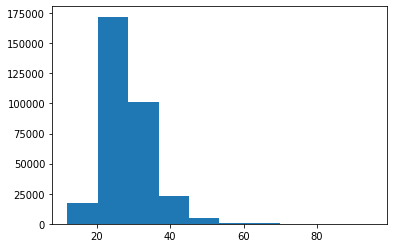

In [23]:
plt.hist(df['BMI'])

(array([131908.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 187887.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

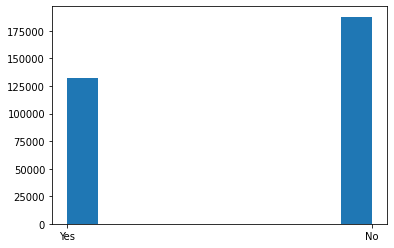

In [24]:
plt.hist(df['Smoking'])

(array([298018.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  21777.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

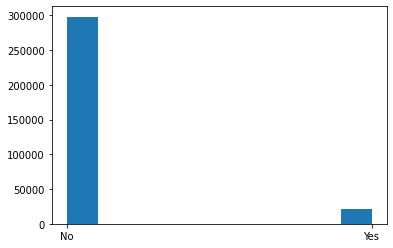

In [25]:
plt.hist(df['AlcoholDrinking'])

(array([251958.,  20691.,   6823.,   5718.,   3589.,   5257.,   3418.,
           761.,   1297.,  20283.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

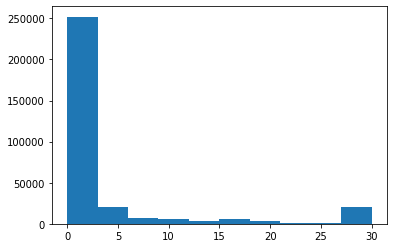

In [26]:
plt.hist(df['PhysicalHealth'])

(array([231187.,  29994.,   8132.,  10799.,   2915.,  10176.,   5663.,
           518.,   2080.,  18331.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

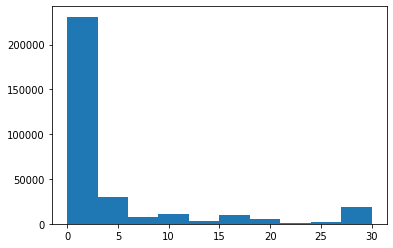

In [27]:
plt.hist(df['MentalHealth'])


In [28]:
#plt.hist(df['DiffWalking'])


(array([167805.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 151990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

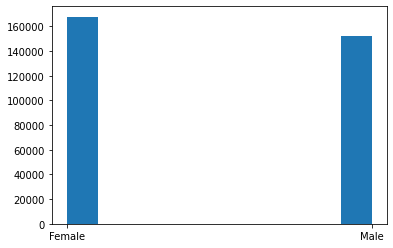

In [29]:
plt.hist(df['Sex'])

(array([245212.,      0.,  22939.,      0.,   8068.,      0.,   5202.,
             0.,  10928.,  27446.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

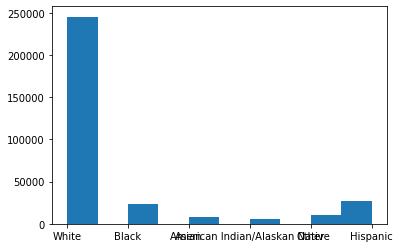

In [30]:
plt.hist(df['Race'])

(array([ 40802.,      0.,      0., 269653.,      0.,      0.,   6781.,
             0.,      0.,   2559.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

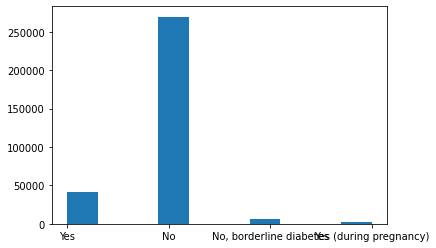

In [31]:
plt.hist(df['Diabetic'], rwidth=16)

(array([247957.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  71838.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

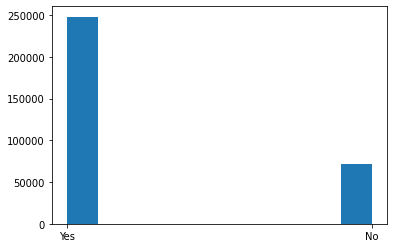

In [32]:
plt.hist(df['PhysicalActivity'])

(array([113858.,      0.,  34677.,      0.,      0.,  93129.,      0.,
         11289.,      0.,  66842.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

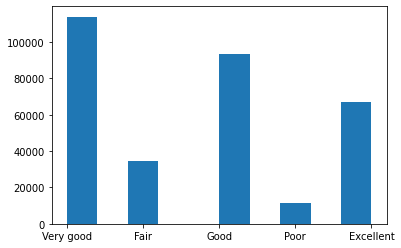

In [33]:
plt.hist(df['GenHealth'])

(array([3.33100e+03, 2.69340e+04, 1.64472e+05, 1.21439e+05, 2.62000e+03,
        3.40000e+02, 4.46000e+02, 1.05000e+02, 6.60000e+01, 4.20000e+01]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <a list of 10 Patch objects>)

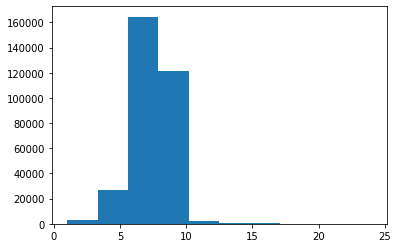

In [34]:
plt.hist(df['SleepTime'])

(array([ 42872.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 276923.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

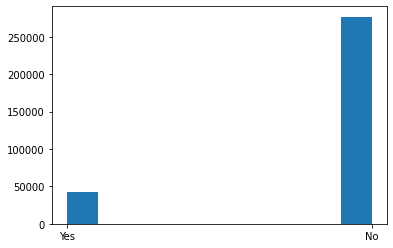

In [35]:
plt.hist(df['Asthma']) 

(array([308016.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  11779.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

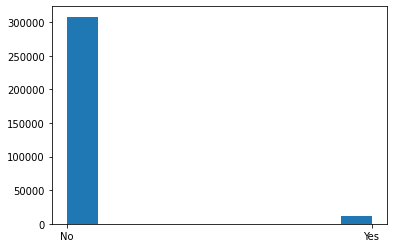

In [36]:
plt.hist(df['KidneyDisease'])

(array([ 29819.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 289976.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

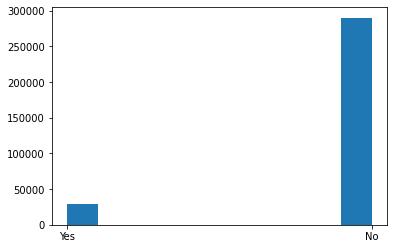

In [37]:
plt.hist(df['SkinCancer'])

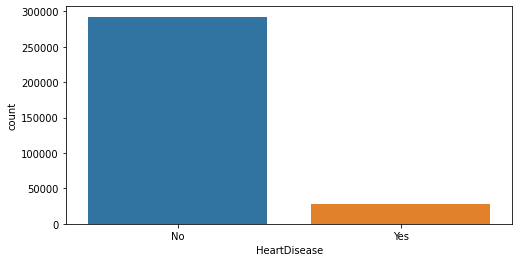

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["HeartDisease"])
plt.show()

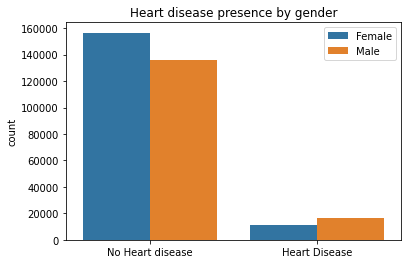

In [39]:
f = sns.countplot(x='HeartDisease', data=df, hue='Sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

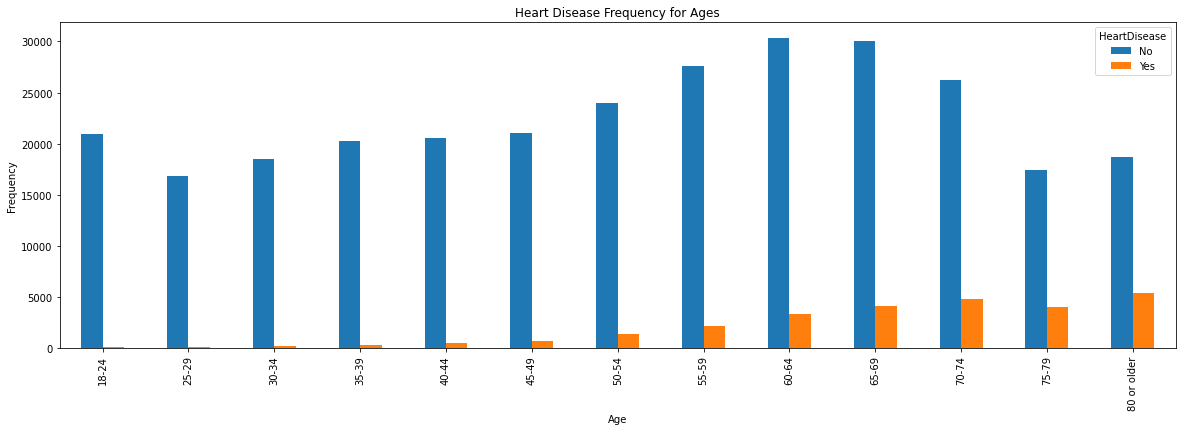

In [40]:
pd.crosstab(df.AgeCategory,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

We now know that there is no relationship between BMI and PhysicalHealth with respect to the HeartDisease..

---



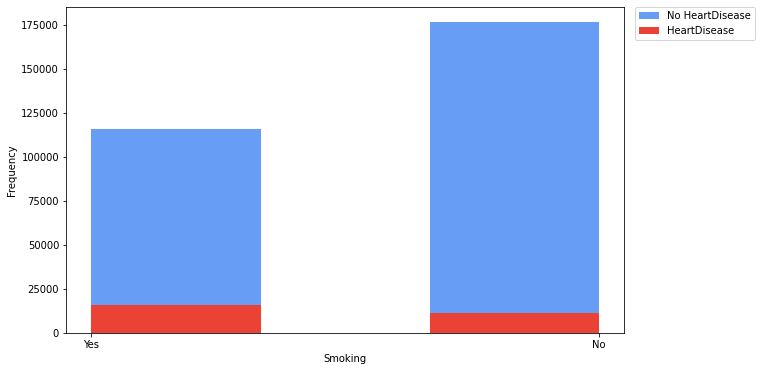

In [41]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


#sns.histplot(data=df, x="BMI", stat="HeartDisease", discrete=True)

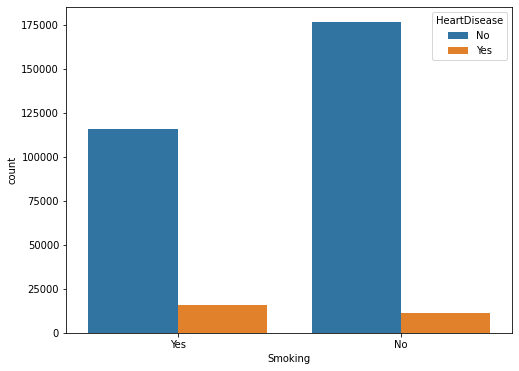

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(x='Smoking',hue='HeartDisease',data=df)
plt.show()

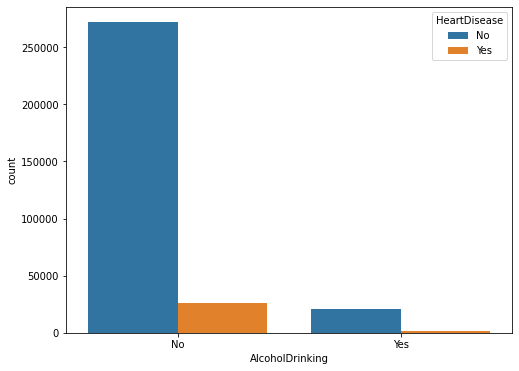

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x='AlcoholDrinking',hue='HeartDisease',data=df)
plt.show()

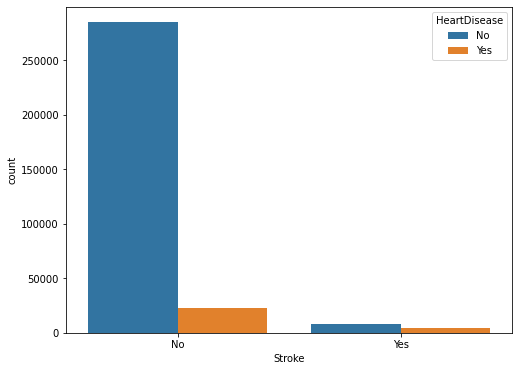

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x='Stroke',hue='HeartDisease',data=df)
plt.show()

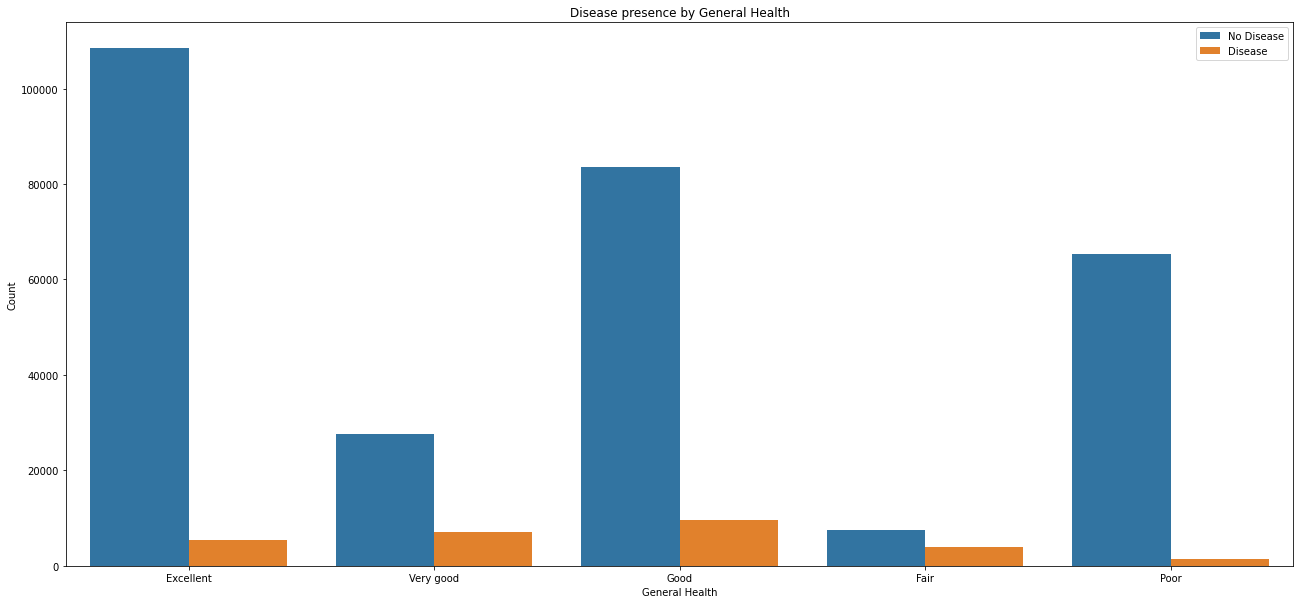

In [45]:
plt.figure(figsize=(22,10))
f = sns.countplot(x='GenHealth', data=df, hue='HeartDisease')
f.set_xticklabels(['Excellent', 'Very good', 'Good', 'Fair','Poor']);
f.set_title('Disease presence by General Health')

plt.ylabel('Count')
plt.xlabel('General Health')
plt.legend(['No Disease', 'Disease']);

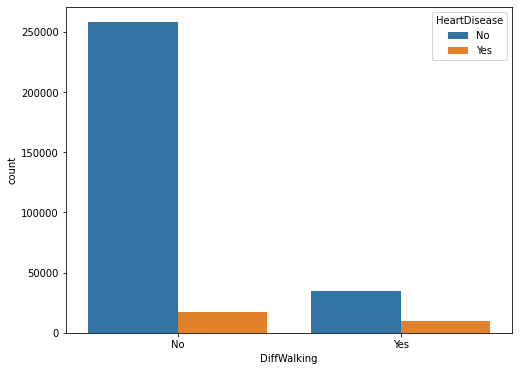

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x='DiffWalking',hue='HeartDisease',data=df)
plt.show()

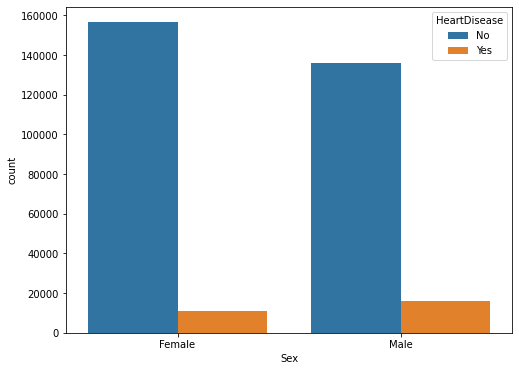

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex',hue='HeartDisease',data=df)
plt.show()

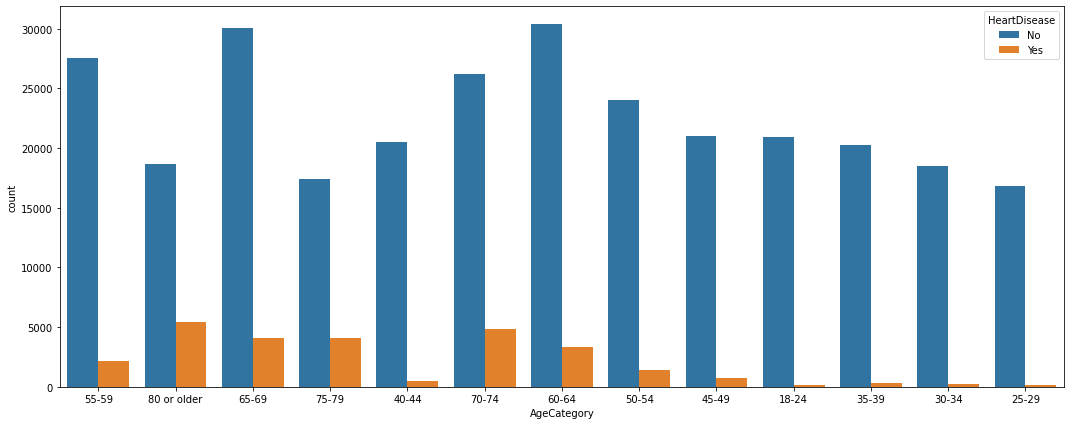

In [48]:
plt.figure(figsize=(18,7))
sns.countplot(x='AgeCategory',hue='HeartDisease',data=df)  
plt.show()

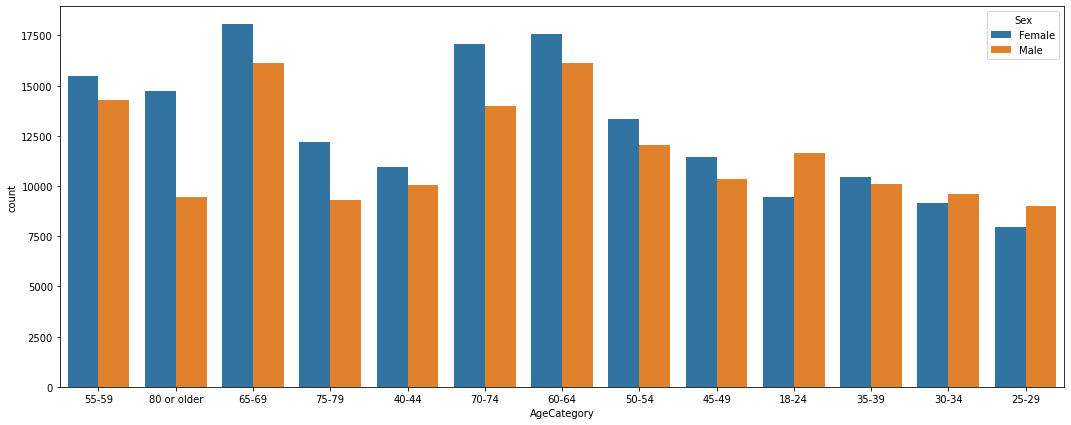

In [49]:
plt.figure(figsize=(18,7))
sns.countplot(x='AgeCategory',hue='Sex',data=df)  
plt.show()

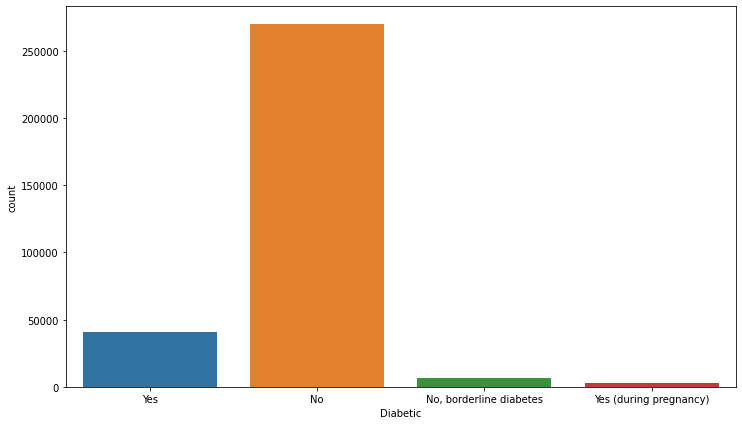

In [50]:

plt.figure(figsize=(12,7))
sns.countplot(x=df["Diabetic"])
plt.show()

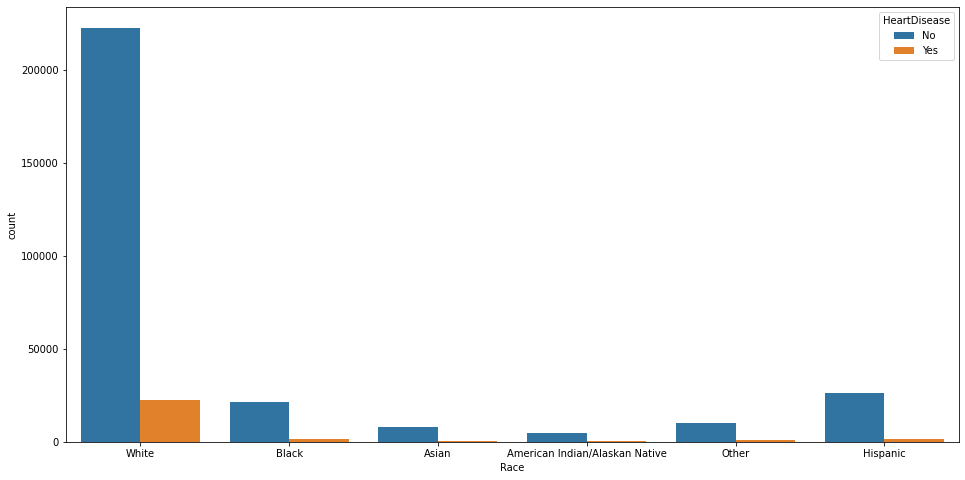

In [51]:
plt.figure(figsize=(16,8))
sns.countplot(x='Race',hue='HeartDisease',data=df)
plt.show()  

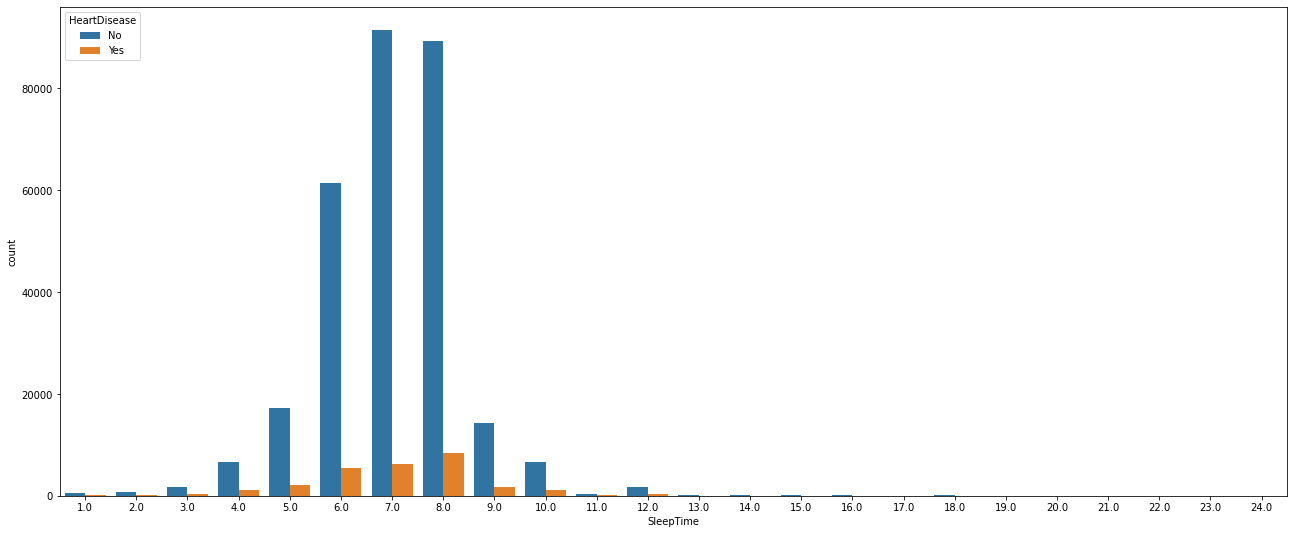

In [52]:
plt.figure(figsize=(22,9))
sns.countplot(data=df, x="SleepTime", hue="HeartDisease")

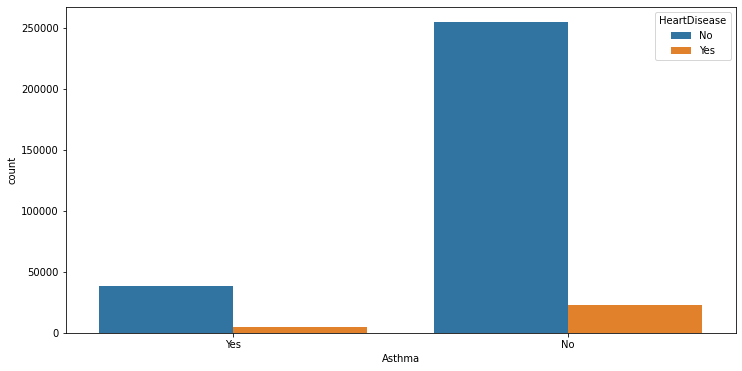

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Asthma", hue="HeartDisease")

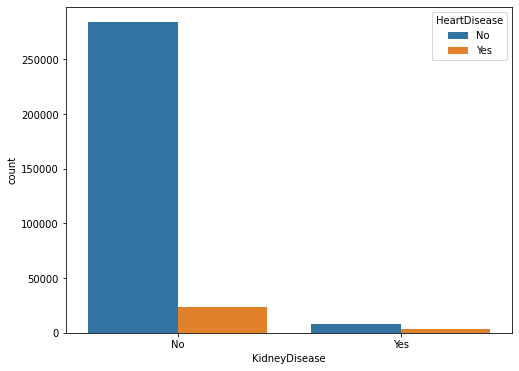

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="KidneyDisease", hue="HeartDisease")

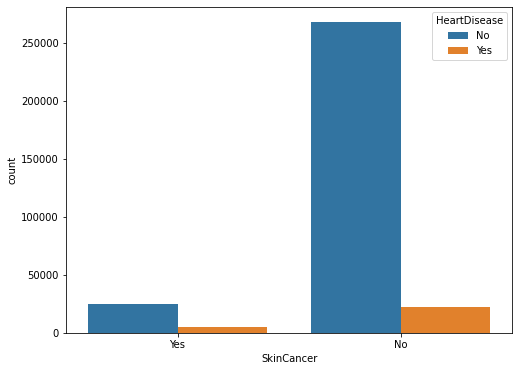

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="SkinCancer", hue="HeartDisease")

**Data Pre-processing**

In [56]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [57]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [58]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

***Convert Categorical Features to Numerical ones***






In [59]:
df['Smoking']=df['Smoking'].replace(['Yes','No'],[1,0])

In [60]:
df['AlcoholDrinking']=df['AlcoholDrinking'].replace(['Yes','No'],[1,0])

In [61]:
df['Stroke']=df['Stroke'].replace(['Yes','No'],[1,0])

In [62]:
df['DiffWalking']=df['DiffWalking'].replace(['Yes','No'],[1,0])

In [63]:
df['Sex']=df['Sex'].replace(['Male','Female'],[1,0])

In [64]:
df['AgeCategory']=df['AgeCategory'].replace(['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'],[1,2,3,4,5,6,7,8,9,10,11,12,13])

In [65]:
# df['Race']=df['Race'].replace(['White','Hispanic','Black','Asian','American Indian/Alaskan Native','Other'],[1,2,3,4,5,6])

In [66]:
df['Diabetic']=df['Diabetic'].replace(['Yes','No','Yes (during pregnancy)','No, borderline diabetes'],[1,0,10,20])

In [67]:
df['PhysicalActivity']=df['PhysicalActivity'].replace(['Yes','No'],[1,0])

In [68]:
df['GenHealth']=df['GenHealth'].replace(['Poor','Fair','Good','Very good','Excellent'],[1,2,3,4,5])

In [69]:
df['Asthma']=df['Asthma'].replace(['Yes','No'],[1,0])

In [70]:
df['KidneyDisease']=df['KidneyDisease'].replace(['Yes','No'],[1,0])

In [71]:
df['SkinCancer']=df['SkinCancer'].replace(['Yes','No'],[1,0])

In [72]:
df['HeartDisease']=df['HeartDisease'].replace(['Yes','No'],[1,0])

In [73]:
data_encoded=pd.get_dummies(df)


***Correlation of Features***

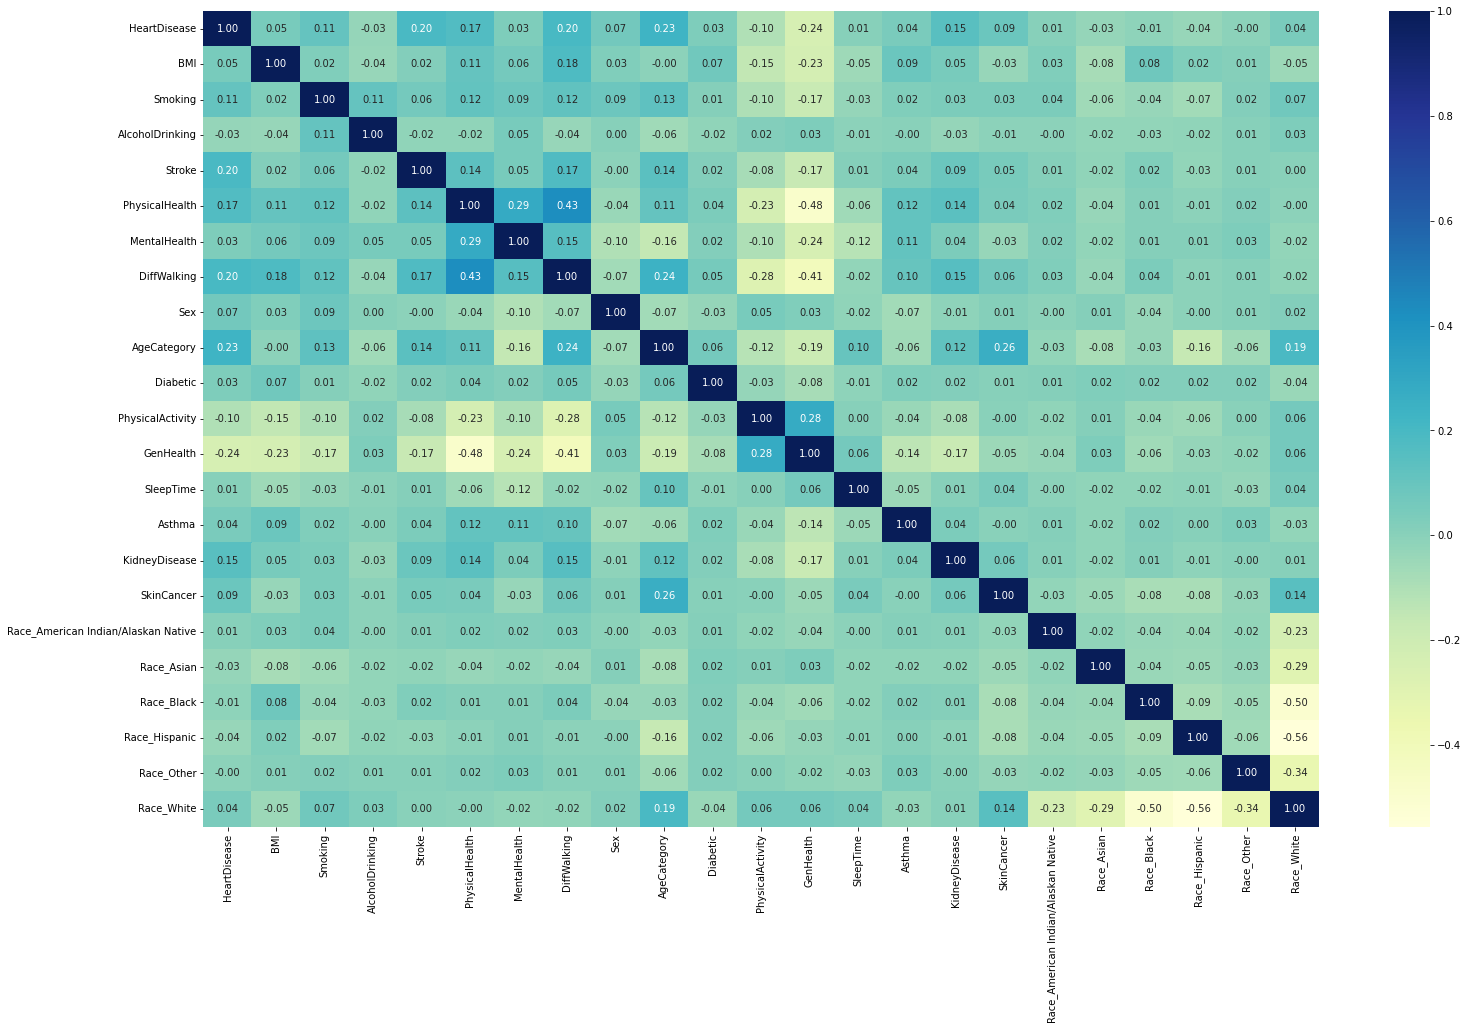

In [74]:
corr= data_encoded.corr()
plt.figure(figsize=(25,15))
cor = data_encoded.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu", fmt='.2f')
plt.show()

**Test-Train Split of Input Dataset**

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x = data_encoded.drop(['HeartDisease'], axis=1)
y = data_encoded["HeartDisease"]


# **MODEL BUILDING**

## Creating Model for **Logistic** **Regression**

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [77]:
#Step 1: Create training/testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=2)
scaler = StandardScaler()

#Step 2: Normalise training data
normalized_x_train = pd.DataFrame(
    scaler.fit_transform(x_train),
    columns = x_train.columns
)

# Step 3: Normalize testing data
normalized_x_test = pd.DataFrame(
    scaler.fit_transform(x_test),
    columns = x_test.columns
)
y_train=np.expand_dims(y_train, axis=-1)
y_test=np.expand_dims(y_test, axis=-1)
x.shape,normalized_x_train.shape,normalized_x_test.shape, y_train.shape, y_test.shape





((319795, 22), (255836, 22), (63959, 22), (255836, 1), (63959, 1))

In [78]:
#transpose matrices
normalized_x_train = normalized_x_train.T
y_train = y_train.T
normalized_x_test = normalized_x_test.T
y_test = y_test.T
y_train.shape, y_test.shape

((1, 255836), (1, 63959))

Let's say weight = 0.01 and bias = 0.0

In [79]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

Sigmoid Function

In [80]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [81]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [82]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [83]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [84]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))
   

iteration: 90
cost: 0.22879050705868317


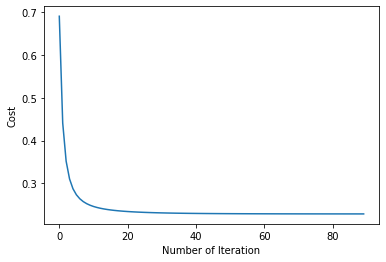

Manuel Test Accuracy: 91.54%


In [85]:
logistic_regression(normalized_x_train,y_train,normalized_x_test,y_test,1.7,90)

In [86]:

# Create a Logistic Regression Model and Train It
lin_model = LogisticRegression(solver='lbfgs')
lin_model.fit(normalized_x_train.T, y_train.T)
print("Linear Model Accuracy: ", lin_model.score(normalized_x_test.T, y_test.T))

# Create a Gaussian Naive Bayes Model and Train It

nb_model = GaussianNB()
nb_model.fit(normalized_x_train.T, y_train.T)
print("Naive Bayes Model Accuracy: ", nb_model.score(normalized_x_test.T, y_test.T))

# Create a Decision Tree Model and Train It

tree_model = DecisionTreeClassifier()
tree_model.fit(normalized_x_train.T, y_train.T)
print("Decision Tree Model Accuracy: ", tree_model.score(normalized_x_test.T, y_test.T))

# Create a Random Forest Model and Train It

forest_model = RandomForestClassifier(n_estimators=100)
forest_model.fit(normalized_x_train.T, y_train.T)
print("Random Forest Model Accuracy: ", forest_model.score(normalized_x_test.T, y_test.T))

# Create a KNeighbors Model and Train It

knn_model = KNeighborsClassifier()
knn_model.fit(normalized_x_train.T, y_train.T)
print("K Nearest Neighbor Model Accuracy: ", knn_model.score(normalized_x_test.T, y_test.T))

# svm_model = SVC(gamma='auto')
# svm_model.fit(normalized_x_train.T, y_train.T)
# print("Support Vector Machine Model Accuracy: ", svm_model.score(normalized_x_test.T, y_test.T))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear Model Accuracy:  0.9153676574055254
Naive Bayes Model Accuracy:  0.8367078909926672


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Model Accuracy:  0.8647727450397911


<ipython-input-86-3e3dbc01dd2e>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(normalized_x_train.T, y_train.T)


Random Forest Model Accuracy:  0.9066902234243812


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K Nearest Neighbor Model Accuracy:  0.9067527634891102


In [136]:
models_fited = {"lr": lin_model,
                "nb":nb_model,
                "tree":tree_model,
                "forest":forest_model,
                "knn":knn_model
                }

Confusion Matrix

In [90]:
# Predicted values
y_head_lr = lin_model.predict(normalized_x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(normalized_x_train.T, y_train.T)
y_head_knn = knn3.predict(normalized_x_test.T)
# y_head_svm = svm_model.predict(x_test.T)
y_head_nb = nb_model.predict(normalized_x_test.T)
y_head_dtc = tree_model.predict(normalized_x_test.T)
y_head_rf = forest_model.predict(normalized_x_test.T)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [91]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test.T,y_head_lr)
cm_knn = confusion_matrix(y_test.T,y_head_knn)
cm_nb = confusion_matrix(y_test.T,y_head_nb)
cm_dtc = confusion_matrix(y_test.T,y_head_dtc)
cm_rf = confusion_matrix(y_test.T,y_head_rf)

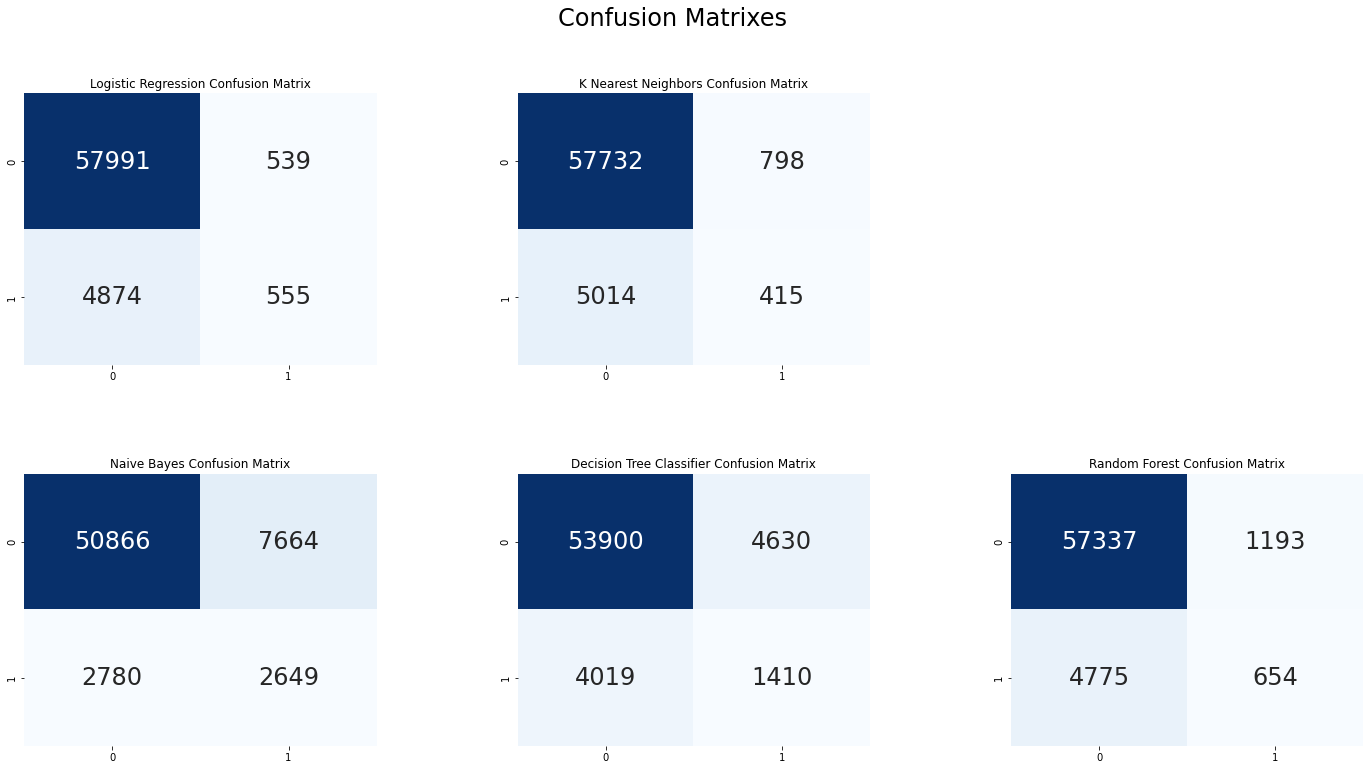

In [93]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# plt.subplot(2,3,3)
# plt.title("Support Vector Machine Confusion Matrix")
# sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

 ***Adaboost Classifier***

In [127]:
from sklearn.ensemble import AdaBoostClassifier
# Put models in a dictionary

models = {"AdaBoost": AdaBoostClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
       
    return model_scores

In [129]:
model_scores = fit_and_score(models=models,
                             X_train=normalized_x_train.T,
                             X_test=normalized_x_test.T,
                             y_train=y_train.squeeze(),
                             y_test=y_test.squeeze())
model_scores


{'AdaBoost': 0.9157116277615347}

In [132]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test.T,y_head_lr) # Accuracy


array([[57991,   539],
       [ 4874,   555]])

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.T,y_head_lr) # Accuracy


0.9153676574055254

In [134]:
from sklearn.metrics import recall_score
recall_score(y_test.T,y_head_lr, average=None) # Recall


array([0.99079105, 0.10222877])

In [135]:
from sklearn.metrics import precision_score
precision_score(y_test.T,y_head_lr, average=None)# Precision

array([0.92246878, 0.50731261])

In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# for name, model in models_fited.items():
#         # Evaluate the model and append its score to model_scores
#         model_scores[name] = model.predict(normalized_x_test.T)
for name, res in model_scores.items():
        print(name+": Accuracy =" )
        print(accuracy_score(y_test.T,res))
        print(" Recall =") # Recall)
        print(recall_score(y_test.T,res, average=None))
        print(" Precision =")
        print(precision_score(y_test.T,y_head_lr, average=None))
        # print(" Precision ="+precision_score(y_test.T,y_head_lr, average=None))
        # Evaluate the model and append its score to model_scores
        # model_scores[name] = model.predict(normalized_x_test.T)


lr: Accuracy =
0.9153676574055254
 Recall =
[0.99079105 0.10222877]
 Precision =
[0.92246878 0.50731261]
nb: Accuracy =
0.8367078909926672
 Recall =
[0.8690586  0.48793516]
 Precision =
[0.92246878 0.50731261]
tree: Accuracy =
0.8647727450397911
 Recall =
[0.92089527 0.25971634]
 Precision =
[0.92246878 0.50731261]
forest: Accuracy =
0.9066902234243812
 Recall =
[0.97961729 0.12046417]
 Precision =
[0.92246878 0.50731261]
knn: Accuracy =
0.9067527634891102
 Recall =
[0.97819921 0.13648922]
 Precision =
[0.92246878 0.50731261]
